# MLP on House Prices with Keras

All Rights Reserved © <a href="http://www.louisdorard.com">Louis Dorard</a>

<img src="http://s3.louisdorard.com.s3.amazonaws.com/DL_icon.png">

## Define `X_train` and `y_train`

In [1]:
import pandas as pd

data = pd.read_csv('csv_file/train.csv')
print(data.shape)

data_test = pd.read_csv('csv_file/test.csv')
test_ID = data_test['Id']

# %run House-Prices-1D.ipynb

(1460, 81)


List of numerical features that don't have missing values:

In [2]:
features_quant = data.select_dtypes(include=['int64','float64']).columns
print(features_quant)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [3]:
features = [
    'MSSubClass', 
#     'LotFrontage', 
    'LotArea', 
    'OverallQual',
    'OverallCond', 
    'YearBuilt', 
    'YearRemodAdd', 
#     'MasVnrArea', 
#     'BsmtFinSF1',
#     'BsmtFinSF2', 
#     'BsmtUnfSF', 
#     'TotalBsmtSF', 
    '1stFlrSF', 
    '2ndFlrSF',
#     'LowQualFinSF', 
    'GrLivArea', 
#     'BsmtFullBath', 
#     'BsmtHalfBath', 
    'FullBath',
    'HalfBath', 
    'BedroomAbvGr', 
    'KitchenAbvGr', 
    'TotRmsAbvGrd',
    'Fireplaces', 
#     'GarageYrBlt', 
#     'GarageCars', 
#     'GarageArea', 
    'WoodDeckSF',
#     'OpenPorchSF', 
#     'EnclosedPorch', 
#     '3SsnPorch', 
#     'ScreenPorch', 
#     'PoolArea',
#     'MiscVal', 
    'MoSold', 
    'YrSold']

In [4]:
X_train_full = data[features].values.astype(float)
y_train_full = data[['SalePrice']].values.astype(float)
print(X_train_full.shape)
print(y_train_full.shape)

(1460, 18)
(1460, 1)


In [5]:
X_test = data_test[features].values.astype(float)
print(X_test.shape)

(1459, 18)


In [6]:
import numpy as np

X_test_df = pd.DataFrame(X_test)
X_test_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1459.000000,1459.000000,1459.000000
mean,57.378341,9819.161069,6.078821,5.553804,1971.357779,1983.662783,1156.534613,325.967786,1486.045922,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,93.174777,6.104181,2007.769705
std,42.746880,4955.517327,1.436812,1.113740,30.390071,21.130467,398.165820,420.610226,485.566099,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,127.744882,2.722432,1.301740
min,20.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,407.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,0.000000,1.000000,2006.000000
25%,20.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,873.500000,0.000000,1117.500000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,0.000000,4.000000,2007.000000
50%,50.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,1079.000000,0.000000,1432.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,0.000000,6.000000,2008.000000
75%,70.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,1382.500000,676.000000,1721.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,168.000000,8.000000,2009.000000
max,190.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,5095.000000,1862.000000,5095.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,1424.000000,12.000000,2010.000000


Split into an actual training set and a validation set.

(Note: make split reproducible -> fix seed of numpy's random number generator, before using scikit)

In [7]:
from numpy import random as np_random
SEED = 42
np_random.seed(SEED)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)
print(X_train.shape)

(1095, 18)


Normalize inputs:

In [9]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_X.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
X_train_scaled = scaler_X.transform(X_train)
X_val_scaled = scaler_X.transform(X_val)

In [11]:
X_test_scaled = scaler_X.transform(X_test)

Log-transform outputs:

In [12]:
from numpy import log
y_train_log = log(y_train)
y_val_log = log(y_val)

Normalize outputs? Could be useful if training an MLP...

_"Reducing the scale of the target variable will, in turn, reduce the size of the gradient used to update the weights and result in a more stable model and training process."_ ([Source](https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/))

In [13]:
scaler_Y_log = StandardScaler()
scaler_Y_log.fit(y_train_log)
y_train_log_scaled = scaler_Y_log.transform(y_train_log)
y_val_log_scaled = scaler_Y_log.transform(y_val_log)

## Model relationship between `x` and  `y`

Make results reproducible -> fix seed of TensorFlow's random number generator

In [14]:
from tensorflow import random as tf_random
tf_random.set_seed(SEED)

Define model:

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import huber_loss

def huber_loss_wrapper(**huber_loss_kwargs):
    def huber_loss_wrapped_function(y_true, y_pred):
        return huber_loss(y_true, y_pred, **huber_loss_kwargs)
    return huber_loss_wrapped_function



Using TensorFlow backend.


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
n_input = X_train.shape[1]
model = Sequential([
    Input(shape=n_input),
    Dense(n_input*2, activation='relu',kernel_initializer='normal'), # 36
    Dense(n_input, activation='relu',kernel_initializer='normal'), # 18
    Dense(1)
])

Check model is defined as expected:

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 36)                684       
_________________________________________________________________
dense_1 (Dense)              (None, 18)                666       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 19        
Total params: 1,369
Trainable params: 1,369
Non-trainable params: 0
_________________________________________________________________


## Set up optimizer

Using Adam instead of SGD

In [18]:
# from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD


LEARNING_RATE = 0.01
# model.compile(loss='mse', optimizer=Adam(lr=LEARNING_RATE))
model.compile(loss=huber_loss_wrapper(delta=1.5), optimizer=SGD(lr=LEARNING_RATE))

# loss='mse'

## Fit model

In [19]:
BATCH_SIZE = 50 #n_input
EPOCHS = 300
history = model.fit(X_train_scaled, \
                    y_train_log_scaled, \
                    validation_data=(X_val_scaled, y_val_log_scaled), \
                    epochs=EPOCHS, \
                    batch_size=BATCH_SIZE, \
                    verbose=2)

Train on 1095 samples, validate on 365 samples
Epoch 1/300
1095/1095 - 1s - loss: 0.4453 - val_loss: 0.4688
Epoch 2/300
1095/1095 - 0s - loss: 0.4128 - val_loss: 0.4295
Epoch 3/300
1095/1095 - 0s - loss: 0.3744 - val_loss: 0.3837
Epoch 4/300
1095/1095 - 0s - loss: 0.3290 - val_loss: 0.3320
Epoch 5/300
1095/1095 - 0s - loss: 0.2798 - val_loss: 0.2776
Epoch 6/300
1095/1095 - 0s - loss: 0.2307 - val_loss: 0.2258
Epoch 7/300
1095/1095 - 0s - loss: 0.1866 - val_loss: 0.1811
Epoch 8/300
1095/1095 - 0s - loss: 0.1512 - val_loss: 0.1475
Epoch 9/300
1095/1095 - 0s - loss: 0.1264 - val_loss: 0.1243
Epoch 10/300
1095/1095 - 0s - loss: 0.1102 - val_loss: 0.1098
Epoch 11/300
1095/1095 - 0s - loss: 0.1005 - val_loss: 0.1008
Epoch 12/300
1095/1095 - 0s - loss: 0.0948 - val_loss: 0.0952
Epoch 13/300
1095/1095 - 0s - loss: 0.0911 - val_loss: 0.0915
Epoch 14/300
1095/1095 - 0s - loss: 0.0884 - val_loss: 0.0886
Epoch 15/300
1095/1095 - 0s - loss: 0.0864 - val_loss: 0.0866
Epoch 16/300
1095/1095 - 0s - lo

1095/1095 - 0s - loss: 0.0601 - val_loss: 0.0642
Epoch 133/300
1095/1095 - 0s - loss: 0.0601 - val_loss: 0.0642
Epoch 134/300
1095/1095 - 0s - loss: 0.0599 - val_loss: 0.0642
Epoch 135/300
1095/1095 - 0s - loss: 0.0598 - val_loss: 0.0642
Epoch 136/300
1095/1095 - 0s - loss: 0.0598 - val_loss: 0.0642
Epoch 137/300
1095/1095 - 0s - loss: 0.0597 - val_loss: 0.0641
Epoch 138/300
1095/1095 - 0s - loss: 0.0597 - val_loss: 0.0642
Epoch 139/300
1095/1095 - 0s - loss: 0.0596 - val_loss: 0.0643
Epoch 140/300
1095/1095 - 0s - loss: 0.0595 - val_loss: 0.0642
Epoch 141/300
1095/1095 - 0s - loss: 0.0595 - val_loss: 0.0642
Epoch 142/300
1095/1095 - 0s - loss: 0.0594 - val_loss: 0.0642
Epoch 143/300
1095/1095 - 0s - loss: 0.0593 - val_loss: 0.0642
Epoch 144/300
1095/1095 - 0s - loss: 0.0593 - val_loss: 0.0642
Epoch 145/300
1095/1095 - 0s - loss: 0.0592 - val_loss: 0.0641
Epoch 146/300
1095/1095 - 0s - loss: 0.0592 - val_loss: 0.0641
Epoch 147/300
1095/1095 - 0s - loss: 0.0591 - val_loss: 0.0640
Epoch 

Epoch 263/300
1095/1095 - 0s - loss: 0.0536 - val_loss: 0.0632
Epoch 264/300
1095/1095 - 0s - loss: 0.0537 - val_loss: 0.0633
Epoch 265/300
1095/1095 - 0s - loss: 0.0535 - val_loss: 0.0633
Epoch 266/300
1095/1095 - 0s - loss: 0.0536 - val_loss: 0.0632
Epoch 267/300
1095/1095 - 0s - loss: 0.0535 - val_loss: 0.0631
Epoch 268/300
1095/1095 - 0s - loss: 0.0535 - val_loss: 0.0632
Epoch 269/300
1095/1095 - 0s - loss: 0.0535 - val_loss: 0.0632
Epoch 270/300
1095/1095 - 0s - loss: 0.0535 - val_loss: 0.0632
Epoch 271/300
1095/1095 - 0s - loss: 0.0534 - val_loss: 0.0632
Epoch 272/300
1095/1095 - 0s - loss: 0.0533 - val_loss: 0.0631
Epoch 273/300
1095/1095 - 0s - loss: 0.0533 - val_loss: 0.0631
Epoch 274/300
1095/1095 - 0s - loss: 0.0533 - val_loss: 0.0634
Epoch 275/300
1095/1095 - 0s - loss: 0.0533 - val_loss: 0.0634
Epoch 276/300
1095/1095 - 0s - loss: 0.0532 - val_loss: 0.0633
Epoch 277/300
1095/1095 - 0s - loss: 0.0532 - val_loss: 0.0634
Epoch 278/300
1095/1095 - 0s - loss: 0.0532 - val_loss:

## Review learning curve

In [20]:
import matplotlib.pyplot as plt
%matplotlib notebook
# plt.style.use('dark_background')

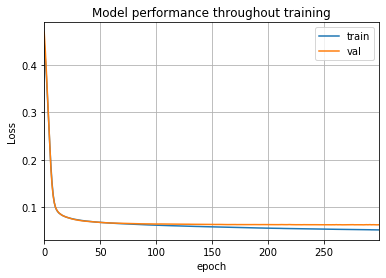

In [21]:
import pandas as pd

pd.DataFrame(history.history).plot()
plt.grid(True)
plt.title('Model performance throughout training')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

## Evaluate model

Predict on val set:

In [22]:
pred_val = model.predict(X_val_scaled)

Wait... what are we predicting again?

In [23]:
y_val_pred_log_scaled = pred_val

De-normalize predictions:

In [24]:
y_val_pred_log = scaler_Y_log.inverse_transform(y_val_pred_log_scaled)

Go back from log-dollars to dollars:

In [25]:
from numpy import exp
y_val_pred = exp(y_val_pred_log)

Compute performance metrics:

In [26]:
from sklearn import metrics
print(metrics.r2_score(y_val, y_val_pred))

0.8901824636183143


In [27]:
from sklearn import metrics
print(metrics.r2_score(y_val_log, y_val_pred_log))

0.8865357812285808


In [28]:
from math import sqrt
sqrt(metrics.mean_squared_error(y_val_log, y_val_pred_log))

0.14016917273872412

In [29]:
from math import sqrt
sqrt(metrics.mean_squared_error(y_val, y_val_pred))

27736.362085180266

## Prédictions sur Test

In [30]:
pred = model.predict(X_test_scaled)

y_pred_log_scaled = pred

De-normalize predictions:

In [31]:
y_pred_log = scaler_Y_log.inverse_transform(y_pred_log_scaled)

Go back from log-dollars to dollars:

In [32]:
from numpy import exp

y_pred = exp(y_pred_log)

In [33]:
y_pred

array([[121105.59],
       [153197.42],
       [170642.36],
       ...,
       [171956.44],
       [135116.98],
       [222495.48]], dtype=float32)

In [34]:
test_ID

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [35]:
import kaggle

sub = pd.DataFrame()
print(sub.shape)

(0, 0)


In [36]:
sub['Id'] = test_ID
sub['SalePrice'] = y_pred
print(sub.shape)

(1459, 2)


In [37]:
sub.describe()

,Id,SalePrice
count,1459.000000,1459.000000
mean,2190.000000,177034.281250
std,421.321334,72136.585938
min,1461.000000,51656.691406
25%,1825.500000,126156.656250
50%,2190.000000,158478.375000
75%,2554.500000,209070.484375
max,2919.000000,722091.562500


In [39]:
sub.to_csv('csv_file/house_prices_pred.csv', index=False)

submission_file = 'csv_file/house_prices_pred.csv'
kaggle.api.competition_submit(submission_file, 
                              "MLP.Keras-20features-num)", 
                              "house-prices-advanced-regression-techniques")

100%|██████████| 21.1k/21.1k [00:03<00:00, 5.69kB/s]


Successfully submitted to House Prices: Advanced Regression Techniques